In [1]:
import numpy as np
import networkx as nx
import copy
import matplotlib.pyplot as plt

%matplotlib inline

In [8]:
def make_layered_network(N, average_degree, community_number, mu):
    assert N % community_number == 0, 'N must be devisible by community_number'
    size = N/community_number
    G = np.zeros((N, N))
    for i in range(N):
        com_index = i//size
        for j in range(N):
            if j <= size*(com_index+1) and j >= size*com_index:
                if i != j and np.random.rand() < average_degree*(1-2*mu)/(size-1):
                    G[i][j] = 1
            elif j >= size*(com_index-1) and j <= size*(com_index+2):
                if np.random.rand() < average_degree*mu/size:
                    G[i][j] = 1
                    
    return G

In [9]:
N_NODES = 200
mu = 0.1
G = make_layered_network(N_NODES, 15, 4, mu)

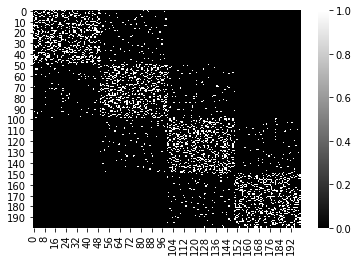

In [10]:
import seaborn as sns
sns.heatmap(G, cmap='gray')

In [11]:
def logistic_map(x, a):
    return 1-a*np.square(x)

In [12]:
def coupled_map_on_networks(x_t, G, epsilon, a, degrees_inv):
    x_t_1 = (1-epsilon)*logistic_map(x_t, a) + degrees_inv*epsilon*np.dot(G, logistic_map(x_t, a))
    return x_t_1

In [49]:
N_NODES = 200
mu = 0.1
G = make_layered_network(N_NODES, 15, 4, mu)
# G = np.ones((200, 200))

nx_G = nx.from_numpy_matrix(G, create_using=nx.MultiDiGraph())
degrees_inv = np.array([1/d for n, d in nx_G.out_degree()])
T = 500
x = np.zeros((T, N_NODES))
x[0] = np.random.rand(N_NODES)*2-1
for t in range(T-1):
    x[t+1] = coupled_map_on_networks(x[t], G, 0.4, 1.75, degrees_inv)

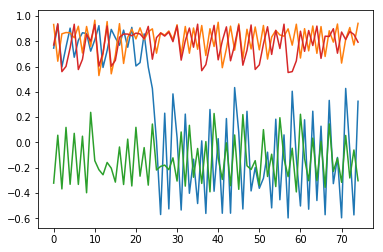

In [50]:
plt.plot(x.T[0][200:350:2])
plt.plot(x.T[50][200:350:2])
plt.plot(x.T[100][200:350:2])
plt.plot(x.T[150][200:350:2])

In [15]:
1-x

array([[0.9409629 , 0.67288697, 1.90849702, ..., 1.76501723, 1.26619256,
        1.02790757],
       [0.24127551, 0.27955393, 1.08334643, ..., 0.91454535, 0.39792209,
        0.24738492],
       [0.7957947 , 0.83618304, 0.21151683, ..., 0.13489755, 0.5372895 ,
        0.7908803 ],
       ...,
       [0.81591134, 0.89085972, 0.80956168, ..., 0.82596911, 0.89413406,
        0.8535403 ],
       [0.06163701, 0.0823323 , 0.11221951, ..., 0.07891069, 0.10825497,
        0.12787288],
       [1.46031677, 1.39541763, 1.31749446, ..., 1.40211388, 1.30197134,
        1.2465486 ]])

In [194]:
for i in range(1000):
    x = logistic_map(x, 1.75)
    print(x)

[-1.84089043e+00 -2.99519283e+00  8.69268664e-01 -7.02603906e-01
  9.54787804e-01  7.06826862e-01 -1.95701287e+00 -6.27032720e+00
  6.60302866e-01  9.54572917e-01 -2.31847376e-03  9.74676723e-01
 -7.18519541e-01  7.92510115e-01  9.16524544e-01  9.75224470e-01
 -4.88989641e+00 -5.22570803e-01  5.87118610e-01  5.58191689e-01
  8.11938359e-01  3.25404865e-01  3.18745994e-01  9.28899185e-01
 -2.74856113e+00  4.48301264e-02 -5.35002695e+00 -4.07785053e+00
  7.82980763e-01 -2.59245956e+00  9.76210797e-01  5.09107052e-01
 -7.35997033e+00 -2.59859283e+00 -2.51363165e-01  6.20561400e-01
 -1.71412759e+00  9.99720478e-01  8.17015409e-01 -2.16516544e+00
  1.19101857e-01 -1.35949563e+00  4.49308801e-01  6.27359995e-02
  9.57035772e-01 -1.09909157e+00 -5.33482595e-01 -1.23364304e+00
  6.89858591e-01 -1.43966120e+00  9.79497239e-01  9.81478474e-01
  9.90896486e-02 -6.05838462e-01 -4.69079496e-01 -3.63665724e-01
 -3.52849470e-01  5.42771628e-01 -1.55249231e+00  6.34382004e-01
  9.92888220e-01 -4.80336

/Users/kohei/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in multiply
  
/Users/kohei/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in square
  



[       -inf        -inf -0.74452374  0.03006489  0.99840211  0.02426972
        -inf        -inf  0.03019844  0.99838707 -0.74442949  0.0350765
 -0.74445672  0.99843635  0.99864272  0.02996862        -inf -0.74441537
  0.02882648  0.99839863  0.03006176  0.99738227  0.03204687  0.99840873
        -inf  0.02883102        -inf        -inf  0.02844358        -inf
 -0.74447849 -0.744431          -inf        -inf  0.99849388  0.03011901
        -inf  0.03020618  0.71100889        -inf  0.03011029        -inf
  0.03001775  0.02985382  0.9975704         -inf  0.99842081        -inf
  0.03003406        -inf -0.74455387  0.02762441  0.02986963  0.99848206
  0.30078607  0.50028208 -0.74490467  0.02978551        -inf  0.99841254
  0.02994065  0.99840733 -0.74442933 -0.74445355  0.99845619  0.89374861
  0.99701038  0.02457945        -inf -0.74247002  0.05135502  0.28946694
        -inf  0.67352992  0.62395597  0.99352213  0.99843837        -inf
  0.99847775        -inf  0.03015309        -inf  0

 -0.74420174        -inf -0.74417597 -0.74422428]
[       -inf        -inf  0.99834388 -0.74419952  0.03082593 -0.74433088
        -inf        -inf -0.74418832  0.03086151  0.99833827  0.98785322
  0.99834001  0.03075905  0.03055643 -0.74420685        -inf  0.99833732
 -0.74426403  0.03083377 -0.74419977  0.03008859 -0.74341245  0.0308116
        -inf -0.74426387        -inf        -inf -0.74427581        -inf
  0.99834133  0.99833837        -inf        -inf  0.03067725 -0.74419514
        -inf -0.74418763  0.99837704        -inf -0.74419586        -inf
 -0.74420318 -0.74421489  0.99846139        -inf  0.03078727        -inf
 -0.74420193        -inf  0.99834545 -0.74429456 -0.74421382  0.03069168
  0.03084803  0.99862028  0.99835851 -0.74421934        -inf  0.03080367
 -0.74420888  0.03081457  0.99833826  0.99833981  0.03072728  0.99822191
  0.04350079 -0.74432891        -inf  0.99862724  0.0300922   0.03024309
        -inf  0.03159713 -0.74476402  0.03936115  0.03075561        -inf
  

  0.99832365        -inf  0.99831961  0.99832699]
[       -inf        -inf  0.03094096  0.99832331 -0.74412952  0.99834073
        -inf        -inf  0.99832157 -0.74412187  0.03096868  0.02947378
  0.03095995 -0.74414324 -0.74418029  0.99832442        -inf  0.03097348
  0.99833249 -0.74412785  0.99832335 -0.74424623  0.99742346 -0.74413253
        -inf  0.99833247        -inf        -inf  0.99833403        -inf
  0.03095341  0.03096818        -inf        -inf -0.74415897  0.99832264
        -inf  0.99832147  0.03079918        -inf  0.99832275        -inf
  0.99832387  0.99832562  0.03055383        -inf -0.74413755        -inf
  0.99832368        -inf  0.03093343  0.9983364   0.99832546 -0.74415627
 -0.7441248   0.03030825  0.0308741   0.99832627        -inf -0.74413418
  0.99832473 -0.74413191  0.03096874  0.03096093 -0.74414948  0.03205589
  0.99850474  0.99834051        -inf  0.03030095 -0.7442458  -0.74422693
        -inf -0.743881    0.99837519  0.02937789 -0.74414393        -inf
 

 -0.74410325        -inf -0.74409404 -0.74411063]
[       -inf        -inf  0.99831443 -0.74410249  0.0310569  -0.74413903
        -inf        -inf -0.74409856  0.03107002  0.9983125   0.99837468
  0.99831311  0.03103392  0.03097536 -0.74410497        -inf  0.99831216
 -0.74412235  0.03105973 -0.74410257  0.03088227  0.99869456  0.0310518
        -inf -0.74412231        -inf        -inf -0.74412555        -inf
  0.99831357  0.99831253        -inf        -inf  0.03100846 -0.74410097
        -inf -0.74409831  0.9983236         -inf -0.74410122        -inf
 -0.74410374 -0.74410762  0.99833708        -inf  0.03104336        -inf
 -0.74410331        -inf  0.99831495 -0.74413039 -0.74410728  0.03101276
  0.03106497  0.99834822  0.9983189  -0.74410906        -inf  0.03104902
 -0.74410565  0.03105285  0.99831249  0.99831304  0.03102371  0.99816196
 -0.74433531 -0.74413858        -inf  0.99834852  0.03088284  0.03090817
        -inf  0.03165096 -0.74419862  0.99837695  0.03103279        -inf
  

 -0.7440781         -inf -0.74407186 -0.744083  ]
[       -inf        -inf  0.99830702 -0.74407759  0.03111791 -0.74410098
        -inf        -inf -0.74407494  0.03112688  0.99830572  0.9983384
  0.99830614  0.03110248  0.03106474 -0.74407925        -inf  0.99830549
 -0.74409058  0.03111984 -0.74407765  0.03100901  0.99839751  0.03111445
        -inf -0.74409056        -inf        -inf -0.74409261        -inf
  0.99830644  0.99830575        -inf        -inf  0.0310858  -0.74407657
        -inf -0.74407477  0.99831288        -inf -0.74407674        -inf
 -0.74407843 -0.74408101  0.99832068        -inf  0.03110878        -inf
 -0.74407814        -inf  0.99830736 -0.74409565 -0.74408078  0.03108859
  0.03112342  0.99832649  0.99830994 -0.74408196        -inf  0.03111258
 -0.7440797   0.03111516  0.99830572  0.99830609  0.03109574  0.99798986
 -0.74419692 -0.74410071        -inf  0.99832664  0.03100933  0.03102402
        -inf  0.03169418 -0.74413482  0.99833931  0.03110173        -inf
  

  0.99830194        -inf  0.99830062  0.99830296]
[       -inf        -inf  0.03114712  0.99830183 -0.7440592   0.99830661
        -inf        -inf  0.99830127 -0.74405663  0.03115588  0.03096195
  0.03115307 -0.74406355 -0.74407393  0.99830218        -inf  0.03115744
  0.99830452 -0.74405865  0.99830184 -0.74408858  0.03071225 -0.74406018
        -inf  0.99830451        -inf        -inf  0.99830493        -inf
  0.03115099  0.03115572        -inf        -inf -0.74406818  0.99830162
        -inf  0.99830124  0.0311088         -inf  0.99830165        -inf
  0.99830201  0.99830255  0.03106065        -inf -0.74406178        -inf
  0.99830195        -inf  0.03114482  0.99830554  0.9983025  -0.74406741
 -0.74405763  0.03102677  0.03112782  0.99830274        -inf -0.74406071
  0.99830227 -0.74405998  0.03115589  0.03115338 -0.74406543 -0.72765523
  0.9983236   0.99830655        -inf  0.03102592 -0.7440885  -0.74408471
        -inf -0.74383174  0.99831305  0.03095722 -0.74406376        -inf
 

  0.99829933        -inf  0.99829824  0.99830016]
[       -inf        -inf  0.03117158  0.99829924 -0.74405054  0.9983031
        -inf        -inf  0.99829878 -0.74404842  0.03117877  0.03102975
  0.03117645 -0.74405412 -0.74406253  0.99829952        -inf  0.03118006
  0.99830143 -0.74405009  0.99829925 -0.74407412  0.03086532 -0.74405135
        -inf  0.99830142        -inf        -inf  0.99830176        -inf
  0.03117475  0.03117863        -inf        -inf -0.74405789  0.99829906
        -inf  0.99829875  0.03114064        -inf  0.99829909        -inf
  0.99829938  0.99829983  0.03110298        -inf -0.74405267        -inf
  0.99829933        -inf  0.03116969  0.99830225  0.99829979 -0.74405727
 -0.74404924  0.03107726  0.03115588  0.99829999        -inf -0.74405179
  0.9982996  -0.74405118  0.03117878  0.03117671 -0.74405565  0.03826465
  0.9983159   0.99830306        -inf  0.03107662 -0.74407406 -0.74407109
        -inf -0.74381026  0.99830812  0.03102637 -0.74405429        -inf
 -

 -0.7440465         -inf -0.7440432  -0.74404902]
[       -inf        -inf  0.99829777 -0.74404623  0.0311958  -0.74405777
        -inf        -inf -0.74404484  0.03120059  0.99829709  0.99831054
  0.99829731  0.03118774  0.03116899 -0.7440471         -inf  0.99829697
 -0.7440528   0.03119682 -0.74404626  0.03114354  0.99832401  0.03119397
        -inf -0.74405279        -inf        -inf -0.74405379        -inf
  0.99829747  0.99829711        -inf        -inf  0.03117929 -0.7440457
        -inf -0.74404475  0.99830065        -inf -0.74404579        -inf
 -0.74404667 -0.744048    0.99830409        -inf  0.031191          -inf
 -0.74404652        -inf  0.99829795 -0.74405526 -0.74404789  0.03118068
  0.03119873  0.99830639  0.99829924 -0.74404849        -inf  0.03119299
 -0.74404733  0.03119435  0.99829709  0.99829729  0.03118429  0.02176065
 -0.74409431 -0.74405765        -inf  0.99830644  0.03114368  0.03115015
        -inf  0.03186635 -0.7440724   0.99831083  0.03118736        -inf
  

 -0.74403856        -inf -0.74403586 -0.74404061]
[       -inf        -inf  0.99829546 -0.74403834  0.03121558 -0.74404763
        -inf        -inf -0.7440372   0.03121952  0.9982949   0.99830533
  0.99829508  0.03120901  0.03119388 -0.74403904        -inf  0.9982948
 -0.74404366  0.03121642 -0.74403836  0.03117377  0.99831472  0.03121409
        -inf -0.74404365        -inf        -inf -0.74404445        -inf
  0.99829521  0.99829491        -inf        -inf  0.03120216 -0.7440379
        -inf -0.74403713  0.99829778        -inf -0.74403798        -inf
 -0.7440387  -0.74403978  0.99830047        -inf  0.03121166        -inf
 -0.74403858        -inf  0.9982956  -0.74404563 -0.74403969  0.03120329
  0.03121799  0.99830223  0.99829665 -0.74404018        -inf  0.03121328
 -0.74403923  0.03121439  0.9982949   0.99829506  0.03120621  0.02982656
 -0.74407545 -0.74404753        -inf  0.99830227  0.03117388  0.03117895
        -inf  0.03200322 -0.74405905  0.99830554  0.03120869        -inf
  0

In [189]:
x = np.ones(10)
x**2

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [134]:
A = nx.from_numpy_matrix(G,create_using=nx.MultiDiGraph())

In [146]:
degree_sequence = [d for n, d in A.out_degree()]
print(degree_sequence)

[11, 14, 19, 18, 17, 13, 11, 15, 12, 15, 12, 17, 10, 19, 13, 20, 11, 16, 13, 17, 13, 14, 9, 12, 19, 17, 16, 13, 10, 12, 8, 8, 13, 13, 13, 8, 13, 9, 8, 14, 10, 13, 15, 12, 7, 16, 10, 9, 12, 7, 10, 12, 19, 20, 16, 19, 16, 14, 20, 11, 21, 17, 13, 12, 15, 23, 10, 18, 13, 17, 20, 21, 10, 8, 16, 18, 11, 21, 13, 18, 17, 13, 12, 16, 14, 12, 16, 7, 21, 21, 12, 17, 17, 17, 14, 16, 19, 14, 18, 18, 18, 19, 15, 16, 21, 15, 15, 17, 16, 17, 13, 15, 20, 17, 16, 12, 10, 17, 13, 17, 20, 17, 16, 14, 14, 12, 13, 11, 18, 12, 9, 17, 20, 18, 14, 13, 18, 15, 11, 11, 16, 13, 11, 8, 13, 10, 13, 13, 11, 20, 16, 15, 11, 5, 9, 21, 9, 16, 12, 13, 14, 10, 11, 12, 12, 14, 15, 11, 12, 9, 12, 15, 9, 22, 13, 12, 8, 12, 15, 13, 11, 14, 13, 18, 17, 14, 12, 19, 10, 9, 14, 13, 16, 16, 8, 13, 15, 10, 13, 11]


In [147]:
print(G[0])

[0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]


In [136]:
degree_sequence = sorted([d for n, d in A.out_degree()], reverse=True)
np.mean(degree_sequence)

14.065